# <span style='color:blue'> <center>Estadística Inferencial</center> </span>
## **Capítulo 2.** Teorema del Límite Central
#### by **Ivan Alducin**
<p><img src="https://cdn.corporatefinanceinstitute.com/assets/Central-Limit-Theorem-CLT-Diagram.png" width="1000"></p>

## Distribución Normal
<p>Como parte de la revisión de desempeño de ventas, vamos a estimar la probabilidad de tener diferentes montos de ventas, pero antes de poder hacer esto, deberás determinar qué tipo de distribución sigue la variable de monto de venta <code>amount</code> en la tabla de <code>deals</code>.</p>

In [1]:
# Importar pandas, numpy y matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importa el archivo deals.csv
df = pd.read_csv('deals.csv')
df.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


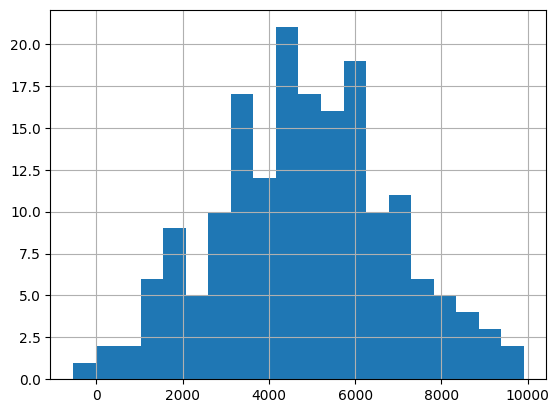

In [7]:
# Crea un histograma de las ventas con 10 bines
df['amount'].hist(bins=20)
plt.show()


In [9]:
# Importar la funcion norm de scipy.stats
from scipy.stats import norm

# Calcular la media de montos de venta
mean = df['amount'].mean()
print('EL promedio es' ,mean)

# Calcular la desviación estandar de los montos de venta
std = df['amount'].std()
print('La desviación estandar es', std)

EL promedio es 4812.000337078652
La desviación estandar es 2058.1732253555597


#### Función de Densidad
<p><img src="https://cdn-5a6cb102f911c811e474f1cd.closte.com/wp-content/uploads/2017/11/Normal-Distribution-Probability-Density-Function.png" width="300"></p>

In [10]:
# Funcion de densidad de la Distribución Normal
def normal_dist(x, mean, std):
    density = np.divide(1, np.sqrt(2 * np.pi * np.power(std,2))) * np.exp(-(1/2) * np.power(np.divide(x - mean, std),2)) 
    return density

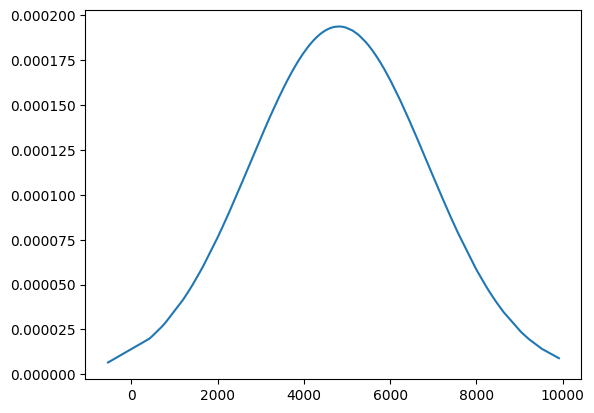

In [11]:
# Visualización
x = np.sort(df["amount"])
pdf = normal_dist(x, mean, std)
plt.plot(x, pdf)

In [12]:
# ¿Cual es la probabilidad de cerrar ventas con un monto menor a 7500?
prob_less_7500 = norm.cdf(7500, mean, std)

print(prob_less_7500)

0.9042258221229889


In [13]:
# ¿Cual es la probabilidad de cerrar ventas con un monto mayor a 8000?
prob_over_1000 = 1 - norm.cdf(8000, mean, std)

print(prob_over_1000)

0.06069732291589003


In [14]:
# ¿Cual es la probabilidad de cerrar ventas con un monto entre 3000 y 7000
prob_3000_to_7000 = norm.cdf(7000, mean, std) - norm.cdf(3000, mean, std)

print(prob_3000_to_7000)

0.6668034681540913


In [15]:
# ¿A qué monto será menor el 25% de las ventas?
pct_25 = norm.ppf(0.25, mean, std)

print(pct_25)

3423.7835924483165


## Simulando ventas con diferentes condiciones
<p>El analista financiero de la compañía predice que el próximo trimestre, el valor de cada venta aumentará en un 20% y la volatilidad, o desviación estándar, del valor de cada venta aumentará en un 30%. Para ver cómo podrían verse las ventas el próximo trimestre bajo estas nuevas condiciones de mercado, simularáa nuevos montos de ventas usando la distribución normal</p>

(array([2., 1., 2., 4., 7., 6., 9., 3., 4., 2.]),
 array([  531.7605962 ,  1627.898884  ,  2724.0371718 ,  3820.1754596 ,
         4916.3137474 ,  6012.45203521,  7108.59032301,  8204.72861081,
         9300.86689861, 10397.00518641, 11493.14347421]),
 <BarContainer object of 10 artists>)

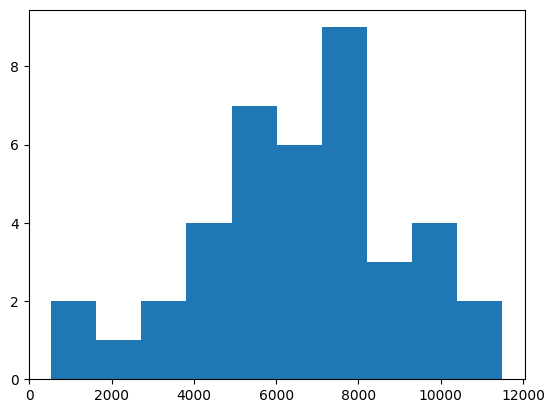

In [16]:
# Calcula la media con el aumento del 20%
new_mean = mean * 1.20

# Calcula la desviación estandar con el aumento del 30%
new_std = std * 1.30

# Simula 40 ventas con estas condiciones
new_sales = norm.rvs(new_mean, new_std, size=40)

# grafica un histograma para visualizar la distribución de las ventas
plt.hist(new_sales)

## ¿Cuál escenario es mejor?
<p>El indicador principal que utiliza la empresa para evaluar a los vendedores es el porcentaje de ventas que obtienen por encima de los <code>1000</code>, ya que el tiempo invertido en cada venta generalmente vale un poco más que eso, por lo que cuanto más alta sea esta métrica, mejor se desempeñará el vendedor. Basado solo en la métrica del porcentaje de ventas superiores a $1000, ¿La empresa se desempeña mejor en el mercado actual o en el mercado previsto?</p>

<p><img src="https://media.tenor.com/images/6e272141c9a5887fb4ffd447aa2ffda7/tenor.png" width="500"></p>

In [17]:
print(1 - norm.cdf(1000, mean, std))
print(1 - norm.cdf(1000, new_mean, new_std))

0.9679962803797578
0.962821103853854


## Muestreo
<p>En el ejercicio anterior contaste los acuerdos por producto, ahora es el momento de elegir al azar cinco ofertas para que podamos comunicarnos con cada cliente y preguntarles si están satisfecho con el servicio que recibieron. Además, deseamos asegurarnos de que esto se haga al azar y que se pueda reproducir en caso de que le pregunten cómo eligió las ofertas, por lo que deberá establecer la semilla aleatoria antes de tomar muestras de las ofertas. .</p>

In [20]:
# Define una semilla aleatoria
np.random.seed(45)

# Muestrea 5 acuerdos sin reemplazo
sample_without_replacement = df.sample(5)
print(sample_without_replacement)

       product   client status   amount  num_users
153  Product D  Current   Lost  5436.98         54
161  Product D  Current    Won  4837.09         31
0    Product F  Current    Won  7389.52         19
64   Product B  Current    Won  1640.06         59
62   Product F  Current    Won  5137.67          3


In [25]:
# Muestrea 5 acuerdos con reemplazo
sample_with_replacement = df.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
164  Product F      New    Won  7576.35         29
95   Product J      New   Lost  4269.87         18
35   Product B  Current    Won  8588.35         52
26   Product B  Current   Lost  5701.70         53
151  Product D  Current    Won  6221.36          2


In [ ]:
# ¿Qué tipo de muestreo es mejor utilizar para esta situación?

## Teorema central de límite
<p>En este ejercicio veremos el teorema del límite central en acción. Examinaremos la columna <code>num_users</code> la cual contiene la cantidad de personas que utilizaron el producto que se vendió</p>

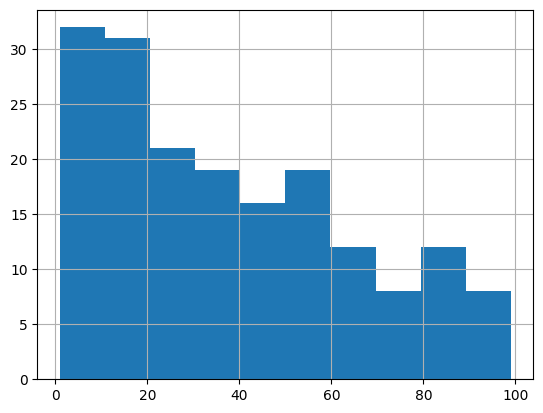

In [26]:
# Grafica un histograma de la variable num_users
df['num_users'].hist()
plt.show()

In [27]:
# Define una semilla aleatoria
np.random.seed(104)

# Muestrea 20 usuarios con reemplazo
samp_20 = df['num_users'].sample(20, replace=True)

# calcula la media de la muestra
print(np.mean(samp_20))

32.0


In [28]:
# Repite el muestreo pero esta vez 1000 veces

sample_means = []

for i in range(1000):
    samp_20 = df['num_users'].sample(20, replace=True)
    # Calcula la media del muestreo de los 20 usuarios
    samp_20_mean = np.mean(samp_20)
    # Concatena los muestreos
    sample_means.append(samp_20_mean)

print(sample_means)

[np.float64(31.35), np.float64(45.05), np.float64(33.55), np.float64(38.15), np.float64(50.85), np.float64(31.85), np.float64(34.65), np.float64(36.25), np.float64(38.9), np.float64(44.05), np.float64(35.45), np.float64(37.6), np.float64(37.95), np.float64(28.85), np.float64(33.3), np.float64(31.65), np.float64(45.5), np.float64(43.2), np.float64(24.4), np.float64(41.05), np.float64(37.2), np.float64(39.3), np.float64(29.45), np.float64(33.55), np.float64(45.3), np.float64(45.1), np.float64(30.95), np.float64(36.25), np.float64(37.65), np.float64(42.55), np.float64(34.55), np.float64(41.1), np.float64(36.9), np.float64(42.45), np.float64(38.45), np.float64(45.9), np.float64(42.7), np.float64(38.4), np.float64(32.55), np.float64(30.25), np.float64(38.0), np.float64(38.75), np.float64(49.3), np.float64(39.55), np.float64(49.05), np.float64(42.05), np.float64(41.0), np.float64(40.6), np.float64(58.25), np.float64(34.55), np.float64(51.2), np.float64(34.15), np.float64(36.95), np.float64(4

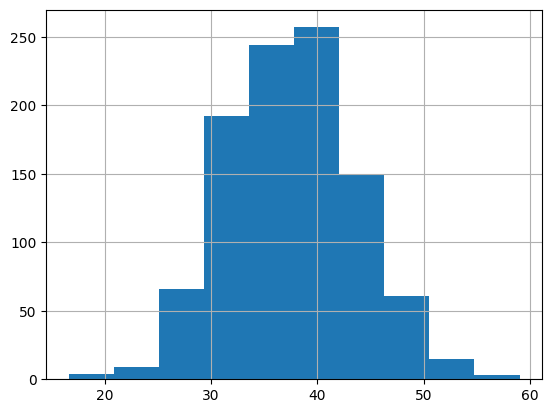

In [29]:
# Grafica un histograma del muestreo anterior (Convierte la lista a una serie)
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
plt.show()

## Otro caso de uso del TCL
<p>Supongamos que queremos saber el promedio de usuarios por venta a nivel global. El problema es que no tenemos la información de todas las ventas, por lo que vamos a estimar la media tomando varias muestras aleatorias de ventas, ya que esto es mucho más fácil que recopilar todos los datos de todos en la empresa.</p>

In [30]:
# Define una semilla aleatoria
np.random.seed(32)

sample_mean = []
# Ciclo de iteración de 30 veces
for i in range(30):
  # Toma una muestra de tamaño 20 del numero de usuarios con reemplazo
  sample = df['num_users'].sample(20, replace=True)
  # Calcula la media de esa muestra
  mean = np.mean(sample)
  # Concatena la media muestral
  sample_mean.append(sample)

# Imprime la media muestral
print(np.mean(sample_means))

# Imprime la media real del numero de usuarios
print(np.mean(df.num_users))

37.6139
37.651685393258425
